In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Exploring the Data

In [2]:
# Let's start with reading the data 

users_data = pd.read_pickle("../data/users_data_final.pkl")

In [3]:
# look at a preview of the data

users_data.head(n = 5)

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,NaN,NaN,47,blue-collar,married,None,False,True,False,None,92,1,-1,0,None,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,None,False,1995-08-01,mobile


In [4]:
# look at the shape of the data (rows, columns)

users_data.shape

(45209, 19)

In [5]:
# How many users do we have in the dataframe?

len(np.unique(users_data.user_id))

# as expected, this is same as the number of rows in the data

45209

In [6]:
users_data.info()

# identify how many variables are numerical (float, int and bool) vs no
# 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

In [7]:
# we can also look at some summary statistics on the features

users_data.describe()

# can anyone see any features with low variance? 
# can anyone see any features with scales of different magnitude?
# can anyone see any correlations between features?

,number_transactions,total_amount_usd,age,duration,campaign,pdays,previous
count,35210.000000,35210.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000
mean,3.977052,1369.417751,40.935853,258.153067,2.763897,40.199651,0.580349
std,3.814329,3063.412688,10.618653,257.525446,3.098076,100.130586,2.303489
min,1.000000,-8019.000000,18.000000,0.000000,1.000000,-1.000000,0.000000
25%,2.000000,73.000000,33.000000,103.000000,1.000000,-1.000000,0.000000
50%,3.000000,451.000000,39.000000,180.000000,2.000000,-1.000000,0.000000
75%,4.000000,1438.000000,48.000000,319.000000,3.000000,-1.000000,0.000000
max,20.000000,102127.000000,95.000000,4918.000000,63.000000,871.000000,275.000000


### Feature Selection: Drop the Date Joined Variable

In [8]:
# Homework: Come up with a way to engineer date joined variable.
# For now, drop this variable

users_data.drop(['date_joined'], axis = 1, inplace = True)

# check varibale is dropped

In [9]:
list(users_data)

['user_id',
 'number_transactions',
 'total_amount_usd',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'term_deposit',
 'device']

### Feature Engineering: Numerical Data

In [10]:
# identify all the numerical features

numerical_columns = list(users_data.select_dtypes(['float64', 'int64', 'bool']).columns)
numerical_columns

['number_transactions',
 'total_amount_usd',
 'age',
 'default',
 'housing',
 'loan',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit']

In [11]:
# how many numerical features do we have

len(numerical_columns)

11

In [12]:
# identify missing values

users_data.isnull().sum()

# what does this output tell us?

user_id                    0
number_transactions     9999
total_amount_usd        9999
age                        0
job                      288
marital                    0
education               1857
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome               36957
term_deposit               0
device                    94
dtype: int64

In [13]:
# identify missing values

users_data.isnull().mean()

# what does this output tell us?


user_id                0.000000
number_transactions    0.221173
total_amount_usd       0.221173
age                    0.000000
job                    0.006370
marital                0.000000
education              0.041076
default                0.000000
housing                0.000000
loan                   0.000000
contact                0.287952
duration               0.000000
campaign               0.000000
pdays                  0.000000
previous               0.000000
poutcome               0.817470
term_deposit           0.000000
device                 0.002079
dtype: float64

In [14]:
# which numerical variables has missing values??

users_data_numerical = users_data[numerical_columns]
users_data_numerical.isnull().mean()

number_transactions    0.221173
total_amount_usd       0.221173
age                    0.000000
default                0.000000
housing                0.000000
loan                   0.000000
duration               0.000000
campaign               0.000000
pdays                  0.000000
previous               0.000000
term_deposit           0.000000
dtype: float64

In [15]:
users_data = pd.read_pickle("../data/users_data_final.pkl")
users_data.drop(['date_joined'], axis = 1, inplace = True)

In [16]:
def identify_missing_data(df):
    """
    This function is used to identify missing data
    
    @param df pandas DataFrame
    
    @return a DataFrame with the percentage of missing data for every feature and the data types
    """
    
    percent_missing = df.isnull().mean()
    
    missing_value_df = pd.DataFrame(percent_missing).reset_index() # convert to DataFrame
    missing_value_df = missing_value_df.rename(columns = {"index" : "feature",
                                                                0 : "percent_missing"}) # rename columns

    missing_value_df = missing_value_df.sort_values(by = ['percent_missing'], ascending = False) # sort the values
    
    data_types_df = pd.DataFrame(df.dtypes).reset_index().rename(columns = {"index" : "feature",
                                                                0 : "data_type"}) # rename columns
    
    missing_value_df = missing_value_df.merge(data_types_df, on = "feature") # join the dataframe with datatype
    
    missing_value_df.percent_missing = round(missing_value_df.percent_missing*100, 2) # format the percent_missing
    
    return missing_value_df

In [17]:
missing_df = identify_missing_data(users_data)
missing_df

,feature,percent_missing,data_type
0,poutcome,81.75,object
1,contact,28.80,object
2,total_amount_usd,22.12,float64
3,number_transactions,22.12,float64
4,education,4.11,object
5,job,0.64,object
6,device,0.21,object
7,campaign,0.00,int64
8,term_deposit,0.00,bool
9,previous,0.00,int64


In [18]:
# subset the data frame by percent missing

missing_df[(missing_df.percent_missing > 0)]

# which numerical 

,feature,percent_missing,data_type
0,poutcome,81.75,object
1,contact,28.80,object
2,total_amount_usd,22.12,float64
3,number_transactions,22.12,float64
4,education,4.11,object
5,job,0.64,object
6,device,0.21,object


In [19]:
# replace missing numerical values with 0

users_data['number_transactions'].fillna(0, inplace = True)
users_data['total_amount_usd'].fillna(0, inplace = True)

In [20]:
# Since we are building a linear regression model, we need to look for highly correlated variables
# look at the correlations, can you see any combinations with high values
# note +1 and -1 means strong positive and negative correlations

users_data.corr()

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
number_transactions,1.000000,-0.053000,-0.006587,0.106674,0.023340,0.058259,-0.013408,0.018530,-0.025933,-0.016458,-0.041566
total_amount_usd,-0.053000,1.000000,0.082964,-0.056963,-0.058107,-0.073512,0.019620,-0.015878,0.004753,0.016606,0.044277
age,-0.006587,0.082964,1.000000,-0.017875,-0.185552,-0.015641,-0.004645,0.004767,-0.023745,0.001297,0.025168
default,0.106674,-0.056963,-0.017875,1.000000,-0.006020,0.077232,-0.010017,0.016819,-0.029982,-0.018331,-0.022421
housing,0.023340,-0.058107,-0.185552,-0.006020,1.000000,0.041341,0.005041,-0.023583,0.124197,0.037087,-0.139161
loan,0.058259,-0.073512,-0.015641,0.077232,0.041341,1.000000,-0.012395,0.009972,-0.022762,-0.011048,-0.068193
duration,-0.013408,0.019620,-0.004645,-0.010017,0.005041,-0.012395,1.000000,-0.084551,-0.001549,0.001213,0.394549
campaign,0.018530,-0.015878,0.004767,0.016819,-0.023583,0.009972,-0.084551,1.000000,-0.088636,-0.032860,-0.073179
pdays,-0.025933,0.004753,-0.023745,-0.029982,0.124197,-0.022762,-0.001549,-0.088636,1.000000,0.454817,0.103616
previous,-0.016458,0.016606,0.001297,-0.018331,0.037087,-0.011048,0.001213,-0.032860,0.454817,1.000000,0.093232


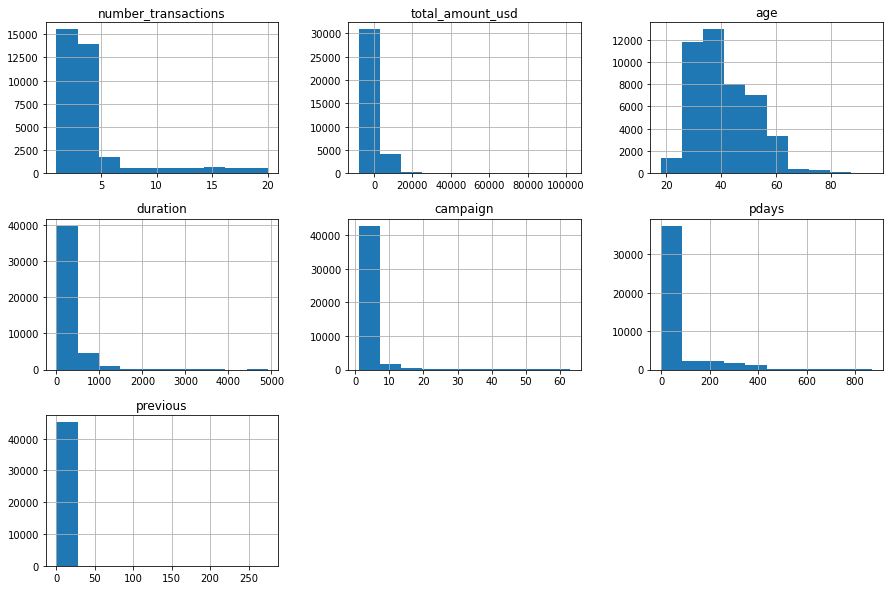

In [21]:
# we might be interested in looking at the distribution of the numerical data

plt.rcParams["figure.figsize"] = (15,10)
users_data_numerical.hist();


# what can we say about the scale
# we need to scale all these variables - which we will do shortly. Remember the scalidng code from last week?

### Feature Engineering: Categorical Data

In [22]:
# identify all the categorical features

categorical_columns = list(users_data.select_dtypes(
                        ['object']).columns)
print("# of categorical columns:", len(categorical_columns))


# of categorical columns: 7


In [23]:
categorical_columns

['user_id', 'job', 'marital', 'education', 'contact', 'poutcome', 'device']

In [24]:
# We want to look at the distribution of e.g. jobs across all users
# We could use the value_counts function to get a count of unique values

users_data.job.value_counts()

blue-collar      9731
management       9457
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

In [25]:
users_data.job.value_counts(dropna = False)

blue-collar      9731
management       9457
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
NaN               288
Name: job, dtype: int64

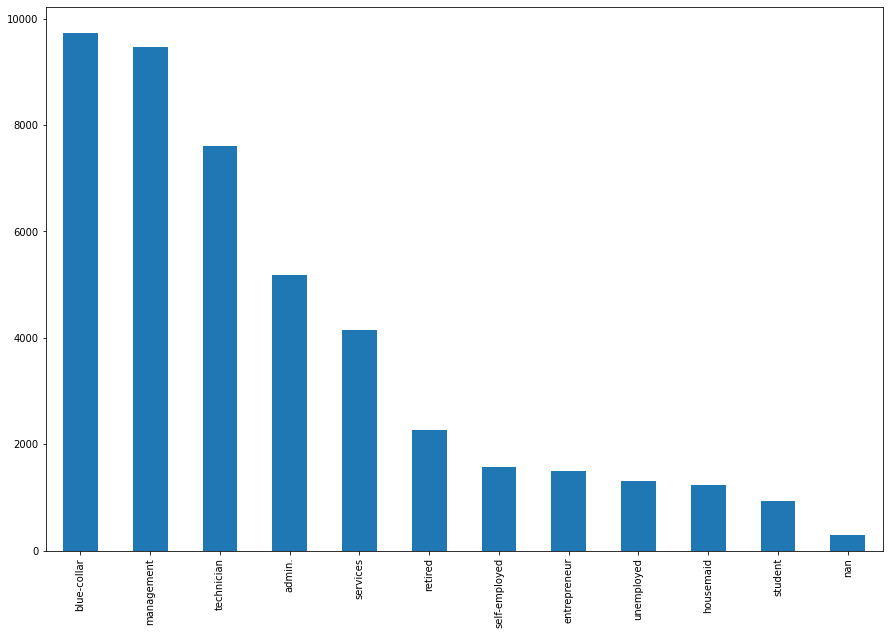

In [26]:
users_data.job.value_counts(dropna = False).plot(kind = 'bar');

In [28]:
# identify and replace missing values

users_data.isnull().sum()

# question: which feature has the most missing data?

user_id                    0
number_transactions        0
total_amount_usd           0
age                        0
job                      288
marital                    0
education               1857
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome               36957
term_deposit               0
device                    94
dtype: int64

In [30]:
users_data.isnull().mean() 


user_id                0.000000
number_transactions    0.000000
total_amount_usd       0.000000
age                    0.000000
job                    0.006370
marital                0.000000
education              0.041076
default                0.000000
housing                0.000000
loan                   0.000000
contact                0.287952
duration               0.000000
campaign               0.000000
pdays                  0.000000
previous               0.000000
poutcome               0.817470
term_deposit           0.000000
device                 0.002079
dtype: float64

In [31]:
missing_value_df = identify_missing_data(users_data)
missing_value_df

,feature,percent_missing,data_type
0,poutcome,81.75,object
1,contact,28.80,object
2,education,4.11,object
3,job,0.64,object
4,device,0.21,object
5,term_deposit,0.00,bool
6,previous,0.00,int64
7,pdays,0.00,int64
8,campaign,0.00,int64
9,duration,0.00,int64


In [32]:
# subset the dataframe by data type

missing_value_df[missing_value_df.data_type == 'object']

,feature,percent_missing,data_type
0,poutcome,81.75,object
1,contact,28.80,object
2,education,4.11,object
3,job,0.64,object
4,device,0.21,object
10,user_id,0.00,object
14,marital,0.00,object


In [33]:
missing_value_df[(missing_value_df.data_type == 'object') &
                (missing_value_df.percent_missing > 50)
                ]

,feature,percent_missing,data_type
0,poutcome,81.75,object


In [34]:
# drop the feature that has a high percentage of missing data

users_data.drop(['poutcome'], axis = 1, inplace = True)

In [35]:
# check feature dropped

missing_value_df = identify_missing_data(users_data)
missing_value_df[missing_value_df.data_type == 'object']


,feature,percent_missing,data_type
0,contact,28.80,object
1,education,4.11,object
2,job,0.64,object
3,device,0.21,object
9,user_id,0.00,object
13,marital,0.00,object


In [36]:
# replace missing values with "Unknown"

users_data['job'].fillna("Unknown", inplace = True)
users_data['education'].fillna("Unknown", inplace = True)
users_data['contact'].fillna("Unknown", inplace = True)
users_data['device'].fillna("Unknown", inplace = True)


In [37]:
# check do we have any missing data

missing_value_df = identify_missing_data(users_data)
missing_value_df

,feature,percent_missing,data_type
0,user_id,0.0,object
1,loan,0.0,bool
2,term_deposit,0.0,bool
3,previous,0.0,int64
4,pdays,0.0,int64
5,campaign,0.0,int64
6,duration,0.0,int64
7,contact,0.0,object
8,housing,0.0,bool
9,number_transactions,0.0,float64


In [38]:
users_data.info()

# question: what do we do next?
# answer: ENCODING.....

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45209 non-null  object 
 1   number_transactions  45209 non-null  float64
 2   total_amount_usd     45209 non-null  float64
 3   age                  45209 non-null  int64  
 4   job                  45209 non-null  object 
 5   marital              45209 non-null  object 
 6   education            45209 non-null  object 
 7   default              45209 non-null  bool   
 8   housing              45209 non-null  bool   
 9   loan                 45209 non-null  bool   
 10  contact              45209 non-null  object 
 11  duration             45209 non-null  int64  
 12  campaign             45209 non-null  int64  
 13  pdays                45209 non-null  int64  
 14  previous             45209 non-null  int64  
 15  term_deposit         45209 non-null 

In [39]:
def identify_number_categories(df):
    """This definition can be used to identify the number of categories of every categorical feature 
    
    @param df DataFrame 
    
    @param returns a DataFrame with the categorical features and number of categories"""

    categorical_columns = list(df.select_dtypes(['object']).columns)

    cat_df = []

    for c in categorical_columns:
        cat_df.append({"categorical_feature": c,
                       "number_categories": len(df[c].value_counts(dropna = False))
                    })
        
    return pd.DataFrame(cat_df)

In [40]:
cat_df = identify_number_categories(users_data)
cat_df

,categorical_feature,number_categories
0,user_id,45209
1,job,12
2,marital,3
3,education,4
4,contact,3
5,device,4


In [41]:
# drop catgeorical features where number_categories is greater than 10
features_to_drop = list(cat_df[cat_df.number_categories > 10].categorical_feature)
print(features_to_drop)

['user_id', 'job']


In [42]:
users_data.drop(features_to_drop, axis = 1, inplace = True)

In [43]:
# check the variables were dropped

list(users_data)

['number_transactions',
 'total_amount_usd',
 'age',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'device']

In [44]:
# identify all the categorical variables 

categorical_columns = list(users_data.select_dtypes(['object']).columns)

categorical_columns

['marital', 'education', 'contact', 'device']

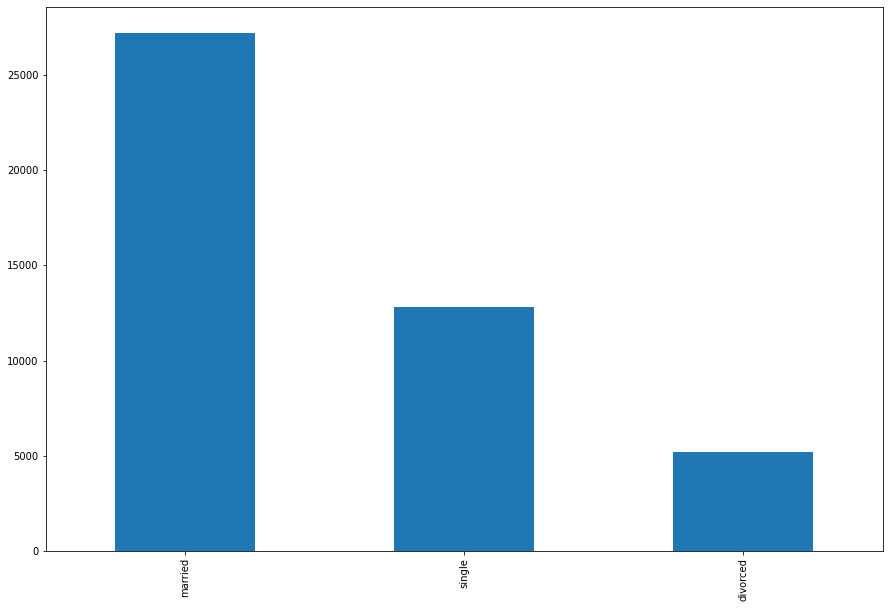

In [45]:
# look at the distribution of one of the categorical variables

users_data.marital.value_counts().plot(kind = 'bar');

In [46]:
# encode the categorical variables
# lots of ways to do that, but we will use pd.get_dummies function
# lets start with marital
# we use pandas get dummies function

pd.get_dummies(users_data['marital'], prefix='marital')

# you can also one of dummy variables, as it can be inferred by the other dummy variables

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
45211,0,1,0
45212,1,0,0
45213,0,1,0
45214,0,1,0


In [47]:
def one_hot(df, categorical_cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    
    for c in categorical_cols:
        dummies = pd.get_dummies(df[c], prefix=c)
        df = pd.concat([df, dummies], axis=1)
        df.drop(c, axis = 1, inplace = True)
    
    return df

In [48]:
# encode all of the categorical columns

categorical_columns = list(users_data.select_dtypes(['object']).columns)

users_data_w_encoding = one_hot(users_data, categorical_columns)

In [49]:
# preview the data

users_data_w_encoding.head(n = 5)

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,...,education_primary,education_secondary,education_tertiary,contact_Unknown,contact_cellular,contact_telephone,device_Unknown,device_desktop,device_mobile,device_tablet
0,3.0,2143.0,58,False,True,False,261,1,-1,0,...,0,0,1,1,0,0,0,0,1,0
1,0.0,0.0,44,False,True,False,151,1,-1,0,...,0,1,0,1,0,0,0,1,0,0
2,2.0,2.0,33,False,True,True,76,1,-1,0,...,0,1,0,1,0,0,0,0,1,0
3,0.0,0.0,47,False,True,False,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,1.0,1.0,33,False,False,False,198,1,-1,0,...,0,0,0,1,0,0,0,0,1,0


In [50]:
print(users_data.shape)
print(users_data_w_encoding.shape)

# you should have ten new columns

(45209, 15)
(45209, 25)


In [52]:
users_data_w_encoding.info()

# Check all the data is numerical and has no missing values
# If not, do not continue

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number_transactions  45209 non-null  float64
 1   total_amount_usd     45209 non-null  float64
 2   age                  45209 non-null  int64  
 3   default              45209 non-null  bool   
 4   housing              45209 non-null  bool   
 5   loan                 45209 non-null  bool   
 6   duration             45209 non-null  int64  
 7   campaign             45209 non-null  int64  
 8   pdays                45209 non-null  int64  
 9   previous             45209 non-null  int64  
 10  term_deposit         45209 non-null  bool   
 11  marital_divorced     45209 non-null  uint8  
 12  marital_married      45209 non-null  uint8  
 13  marital_single       45209 non-null  uint8  
 14  education_Unknown    45209 non-null  uint8  
 15  education_primary    45209 non-null 